In [2]:
from projet_etu import *
import matplotlib.pyplot as plt
import numpy as np
from utils.mltools import *
import pickle as pkl 
from sklearn.manifold import TSNE

/Users/tian/Documents/androide/ml/proj nouveau/projet_final/projet_etu.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


100%|██████████| 500/500 [00:07<00:00, 71.34it/s]


Training completed.
Meilleure accuracy sur les données d'entraînement : 0.8183
Meilleure accuracy sur les données de test : 0.7333


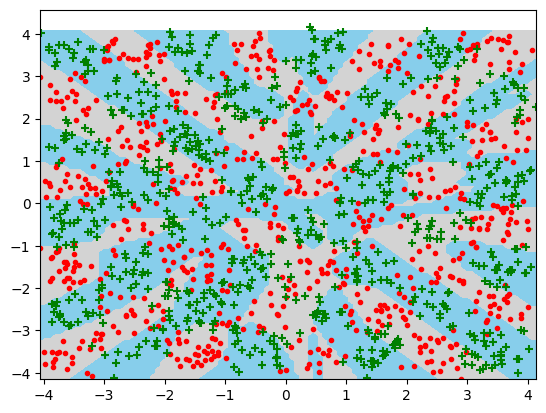

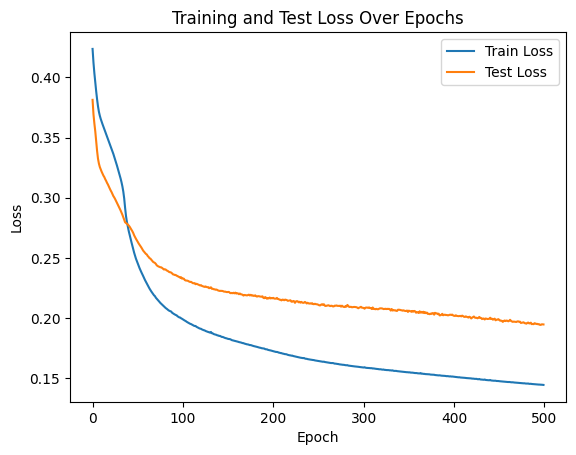

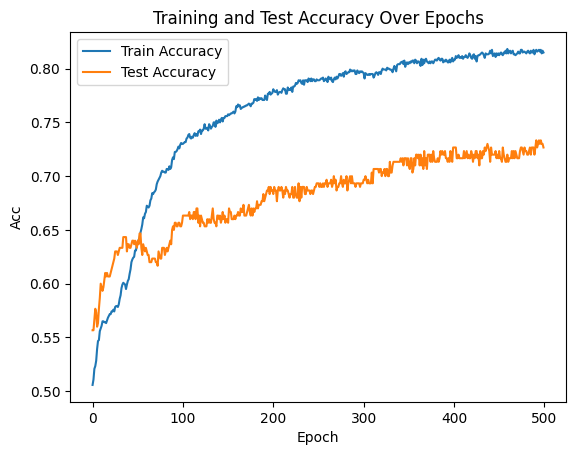

In [6]:
size = 1500

datax, datay = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=size, data_type=2, epsilon=0.1)
testx, testy = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=size, data_type=2, epsilon=0.1)


datay = np.where(datay==-1,0,1).reshape((-1,1))
testy = np.where(testy==-1,0,1).reshape((-1,1))



nh = 80
nh2 = 40
nh3 = 20

def pred(x):
    return np.where(x >= 0.5,1, 0)

    
loss_mse = MSELoss()
couche_lin = Linear( datax.shape[1], nh,type="normal")
couche_lin2 = Linear(nh, nh2,type="normal")
couche_lin3 = Linear(nh2, nh3,type="normal")
couche_lin4  = Linear(nh3, 1,type="normal")


sig = Sigmoid()
tan = TanH()

net = Sequential([couche_lin,tan,couche_lin2,tan,couche_lin3,tan,couche_lin4,sig])

opt = Optim(net,loss_mse,eps=1e-4)
sizeba = 150
opt.SGD(datax,datay,sizeba,epochs=500,test_train_split=True,verbose=False)

# Meilleure accuracy
best_train_accuracy = max(opt.train_score)
best_test_accuracy = max(opt.test_score)

print(f"Meilleure accuracy sur les données d'entraînement : {best_train_accuracy:.4f}")
print(f"Meilleure accuracy sur les données de test : {best_test_accuracy:.4f}")



plot_frontiere(testx, opt.net.predict, step=100)
plot_data(testx, testy.reshape(-1))
plt.figure()



plt.plot(opt.train_loss, label='Train Loss')
plt.plot(opt.test_loss, label='Test Loss')
plt.legend(('Train Loss', 'Test Loss'))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.show()

plt.plot(opt.train_score, label='Train Acc')
plt.plot(opt.test_score, label='Test Acc')
plt.legend(('Train Accuracy', 'Test Accuracy'))
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Training and Test Accuracy Over Epochs')
plt.show()


### Comparaison des tailles de batch

  0%|          | 0/500 [00:00<?, ?it/s]

Training completed.


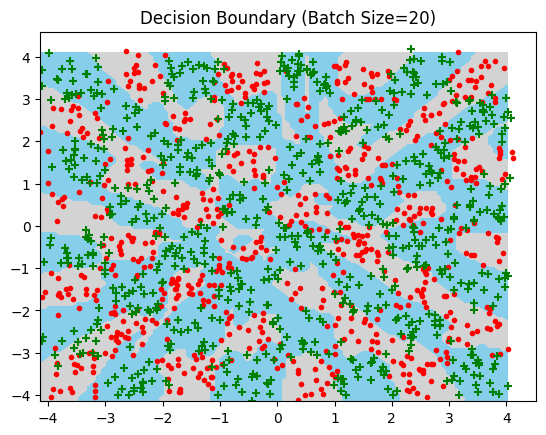

  0%|          | 0/500 [00:00<?, ?it/s]

Training completed.


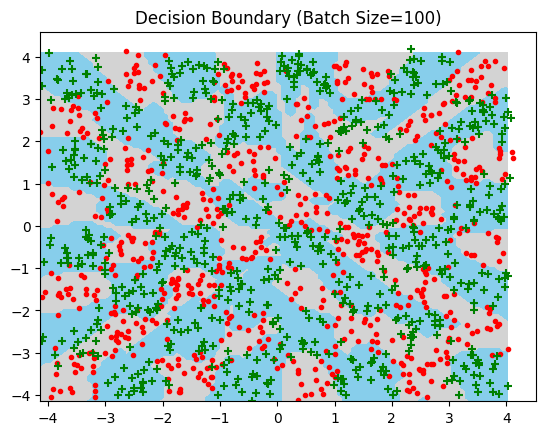

  0%|          | 0/500 [00:00<?, ?it/s]

Training completed.


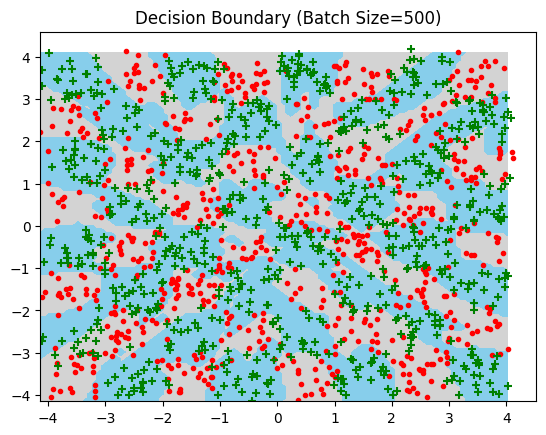

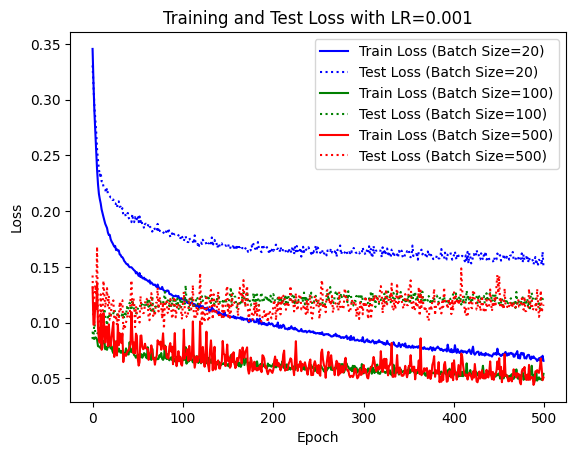

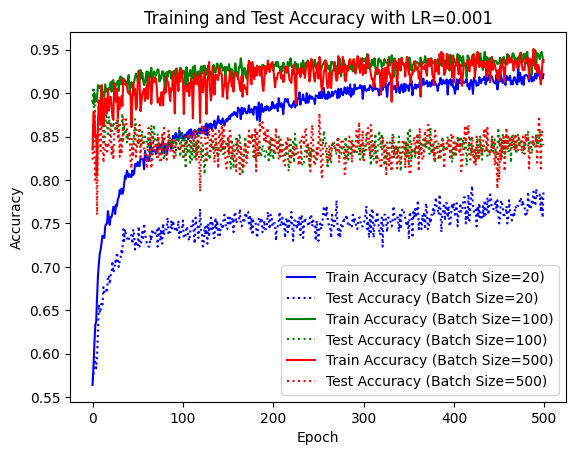

Learning Rate: 0.001, Batch Size: 20
Meilleure accuracy sur les données d'entraînement : 0.9317
Meilleure accuracy sur les données de test : 0.7933
Learning Rate: 0.001, Batch Size: 100
Meilleure accuracy sur les données d'entraînement : 0.9492
Meilleure accuracy sur les données de test : 0.9067
Learning Rate: 0.001, Batch Size: 500
Meilleure accuracy sur les données d'entraînement : 0.9508
Meilleure accuracy sur les données de test : 0.8767


In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Suppose these are defined somewhere in your imports
# from your_library import gen_arti, MSELoss, Linear, Sigmoid, TanH, Sequential, Optim, plot_frontiere, plot_data

size = 1500

datax, datay = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=size, data_type=2, epsilon=0.1)
testx, testy = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=size, data_type=2, epsilon=0.1)

datay = np.where(datay == -1, 0, 1).reshape((-1, 1))
testy = np.where(testy == -1, 0, 1).reshape((-1, 1))

nh = 80
nh2 = 40
nh3 = 20

def pred(x):
    return np.where(x >= 0.5, 1, 0)

loss_mse = MSELoss()
couche_lin = Linear(datax.shape[1], nh, type="normal")
couche_lin2 = Linear(nh, nh2, type="normal")
couche_lin3 = Linear(nh2, nh3, type="normal")
couche_lin4 = Linear(nh3, 1, type="normal")

sig = Sigmoid()
tan = TanH()

net = Sequential([couche_lin, tan, couche_lin2, tan, couche_lin3, tan, couche_lin4, sig])

# Store results for different batch sizes with a fixed learning rate
results = []

# Fixed learning rate
learning_rate = 0.001
batch_sizes = [20, 100, 500]

# Loop over different batch sizes
for batch_size in batch_sizes:
    opt = Optim(net, loss_mse, eps=learning_rate)
    opt.SGD(datax, datay, batch_size, epochs=500, test_train_split=True, verbose=False)

    # Record results
    best_train_accuracy = max(opt.train_score)
    best_test_accuracy = max(opt.test_score)

    results.append({
        'learning_rate': learning_rate,
        'batch_size': batch_size,
        'best_train_accuracy': best_train_accuracy,
        'best_test_accuracy': best_test_accuracy,
        'train_loss': opt.train_loss,
        'train_score': opt.train_score,
        'test_loss': opt.test_loss,
        'test_score': opt.test_score
    })

    # Plot decision boundary for current batch size
    plt.figure()
    plot_frontiere(testx, opt.net.predict, step=100)
    plot_data(testx, testy.reshape(-1))
    plt.title(f'Decision Boundary (Batch Size={batch_size})')
    plt.show()

# Plot loss for different batch sizes with fixed learning rate
plt.figure()
colors = ['b', 'g', 'r']  # Define colors for different batch sizes
for idx, result in enumerate(results):
    batch_size = result['batch_size']
    color = colors[idx]
    plt.plot(result['train_loss'], color=color, linestyle='-', label=f'Train Loss (Batch Size={batch_size})')
    plt.plot(result['test_loss'], color=color, linestyle=':', label=f'Test Loss (Batch Size={batch_size})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Training and Test Loss with LR={learning_rate}')
plt.legend()
plt.show()

# Plot accuracy for different batch sizes with fixed learning rate
plt.figure()
for idx, result in enumerate(results):
    batch_size = result['batch_size']
    color = colors[idx]
    plt.plot(result['train_score'], color=color, linestyle='-', label=f'Train Accuracy (Batch Size={batch_size})')
    plt.plot(result['test_score'], color=color, linestyle=':', label=f'Test Accuracy (Batch Size={batch_size})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title(f'Training and Test Accuracy with LR={learning_rate}')
plt.legend()
plt.show()

# Print the results
for result in results:
    batch_size = result['batch_size']
    print(f"Learning Rate: {learning_rate}, Batch Size: {batch_size}")
    print(f"Meilleure accuracy sur les données d'entraînement : {result['best_train_accuracy']:.4f}")
    print(f"Meilleure accuracy sur les données de test : {result['best_test_accuracy']:.4f}")


### Comparaison des taux d'apprentissage

  0%|          | 0/500 [00:00<?, ?it/s]

Training completed.


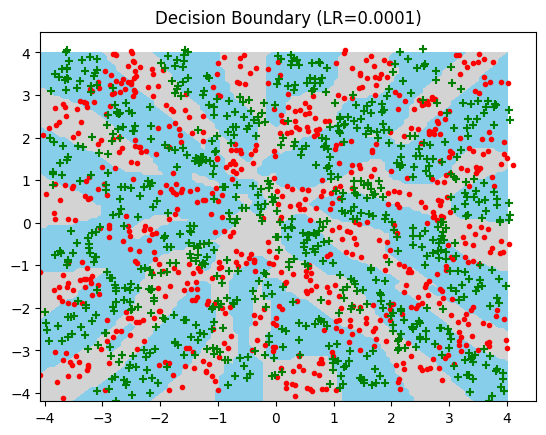

  0%|          | 0/500 [00:00<?, ?it/s]

Training completed.


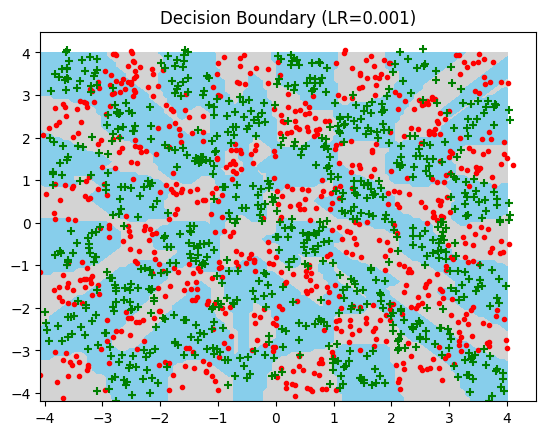

  0%|          | 0/500 [00:00<?, ?it/s]

Training completed.


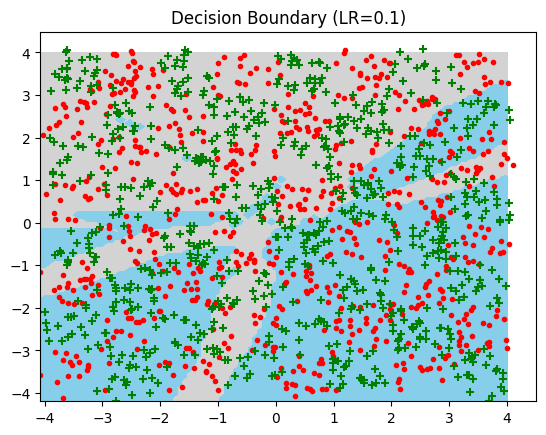

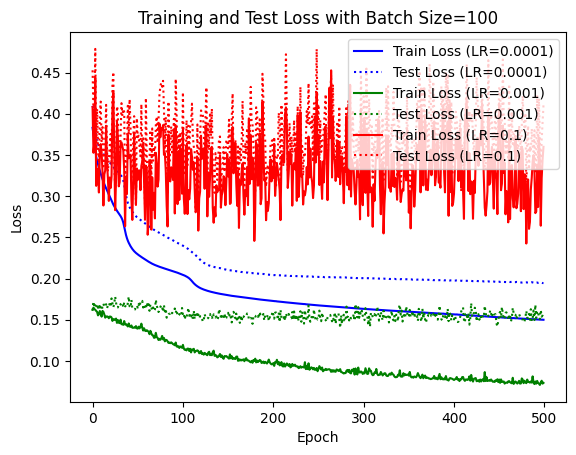

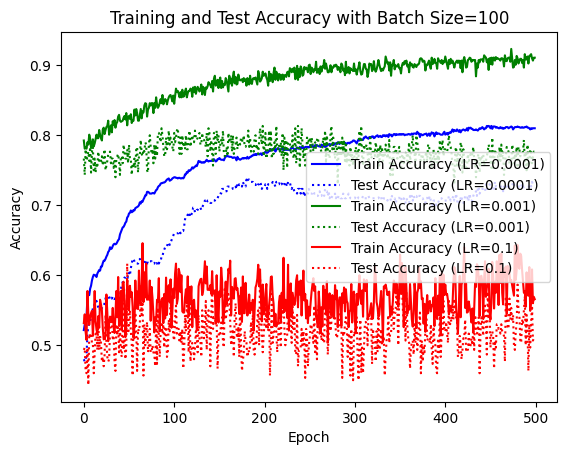

Learning Rate: 0.0001, Batch Size: 100
Meilleure accuracy sur les données d'entraînement : 0.8133
Meilleure accuracy sur les données de test : 0.7367
Learning Rate: 0.001, Batch Size: 100
Meilleure accuracy sur les données d'entraînement : 0.9233
Meilleure accuracy sur les données de test : 0.8133
Learning Rate: 0.1, Batch Size: 100
Meilleure accuracy sur les données d'entraînement : 0.6458
Meilleure accuracy sur les données de test : 0.6167


In [31]:
import numpy as np
import matplotlib.pyplot as plt

size = 1500

datax, datay = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=size, data_type=2, epsilon=0.1)
testx, testy = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=size, data_type=2, epsilon=0.1)

datay = np.where(datay == -1, 0, 1).reshape((-1, 1))
testy = np.where(testy == -1, 0, 1).reshape((-1, 1))

nh = 80
nh2 = 40
nh3 = 20

loss_mse = MSELoss()
couche_lin = Linear(datax.shape[1], nh, type="normal")
couche_lin2 = Linear(nh, nh2, type="normal")
couche_lin3 = Linear(nh2, nh3, type="normal")
couche_lin4 = Linear(nh3, 1, type="normal")

sig = Sigmoid()
tan = TanH()

net = Sequential([couche_lin, tan, couche_lin2, tan, couche_lin3, tan, couche_lin4, sig])

# Store results for different learning rates with a fixed batch size
results = []

# Fixed batch size
batch_size = 100
learning_rates = [0.0001, 0.001, 0.1]

# Loop over different learning rates
for lr in learning_rates:
    opt = Optim(net, loss_mse, eps=lr)
    opt.SGD(datax, datay, batch_size, epochs=500, test_train_split=True, verbose=False)

    # Record results
    best_train_accuracy = max(opt.train_score)
    best_test_accuracy = max(opt.test_score)

    results.append({
        'learning_rate': lr,
        'batch_size': batch_size,
        'best_train_accuracy': best_train_accuracy,
        'best_test_accuracy': best_test_accuracy,
        'train_loss': opt.train_loss,
        'train_score': opt.train_score,
        'test_loss': opt.test_loss,
        'test_score': opt.test_score
    })

    # Plot decision boundary for current learning rate
    plt.figure()
    plot_frontiere(testx, opt.net.predict, step=100)
    plot_data(testx, testy.reshape(-1))
    plt.title(f'Decision Boundary (LR={lr})')
    plt.show()

# Plot loss for different learning rates with fixed batch size
plt.figure()
colors = ['b', 'g', 'r']  # Define colors for different learning rates
for idx, result in enumerate(results):
    lr = result['learning_rate']
    color = colors[idx]
    plt.plot(result['train_loss'], color=color, linestyle='-', label=f'Train Loss (LR={lr})')
    plt.plot(result['test_loss'], color=color, linestyle=':', label=f'Test Loss (LR={lr})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Training and Test Loss with Batch Size={batch_size}')
plt.legend()
plt.show()

# Plot accuracy for different learning rates with fixed batch size
plt.figure()
for idx, result in enumerate(results):
    lr = result['learning_rate']
    color = colors[idx]
    plt.plot(result['train_score'], color=color, linestyle='-', label=f'Train Accuracy (LR={lr})')
    plt.plot(result['test_score'], color=color, linestyle=':', label=f'Test Accuracy (LR={lr})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title(f'Training and Test Accuracy with Batch Size={batch_size}')
plt.legend()
plt.show()

# Print the results
for result in results:
    lr = result['learning_rate']
    print(f"Learning Rate: {lr}, Batch Size: {result['batch_size']}")
    print(f"Meilleure accuracy sur les données d'entraînement : {result['best_train_accuracy']:.4f}")
    print(f"Meilleure accuracy sur les données de test : {result['best_test_accuracy']:.4f}")
